<a href="https://colab.research.google.com/github/JinHyun-P/HelloGit/blob/master/n133a_high_dimensional_data_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 3*

# 📝 Assignment



## 1. 주어진 matrix에 대해서, numpy를 사용하여, `eigenvalue`와 `eigenvector`를 구하세요.

\begin{bmatrix} 4 & 2 \\ 2 & 4 \end{bmatrix}

In [3]:
import numpy as np
import pandas as pd
from numpy import array
from numpy import mean
from numpy import std
from numpy import cov
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline


In [4]:
a = np.array([[4, 2],
              [2, 4]])

In [7]:

eigenvalue, eigenvector = np.linalg.eig(a)
print("Eigenvalue :\n", eigenvalue, '\n')

print("Eigenvector : ")
print(eigenvector,'\n')

Eigenvalue :
 [6. 2.] 

Eigenvector : 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 



## 2. penguins dataset을 사용하여 numerical feature 6개에 대해서 pca를 시행, 이후 pc1-pc2를 사용하여 scatter plot을 그리세요.

<img src='https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png' width = 450>

- [Palmer-penguins](https://github.com/allisonhorst/palmerpenguins) 

데이터셋 사용을 위해, 다음 링크를 참조하세요.

<http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset>



In [9]:
import seaborn as sns
from matplotlib import pyplot as plt

In [10]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [11]:
n_penguin = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
n_penguin.isnull().sum()

bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [12]:
n_penguin = n_penguin.dropna()

In [13]:
n_penguin

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [17]:
X = np.array(n_penguin)

scaler = StandardScaler()

Z = scaler.fit_transform(X)
print("\n Standardized Data: \n", Z)

pca = PCA(2)

pca.fit(Z)

print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

B = pca.transform(Z)
print("\n Projected Data: \n", B)


 Standardized Data: 
 [[-0.88449874  0.78544923 -1.41834665 -0.56414208]
 [-0.81112573  0.1261879  -1.06225022 -0.50170305]
 [-0.66437972  0.43046236 -0.42127665 -1.18853234]
 ...
 [ 1.18828874 -0.73592307  1.50164406  1.93341896]
 [ 0.23443963 -1.19233476  0.7894512   1.24658968]
 [ 1.09657248 -0.53307343  0.86067049  1.49634578]]

 Eigenvectors: 
 [[ 0.45525033 -0.40033468  0.57601332  0.54835019]
 [ 0.59703114  0.79776657  0.0022822   0.08436292]]

 Eigenvalues: 
 [2.76183065 0.7747822 ]

 Projected Data: 
 [[-1.84344489e+00  4.77022173e-02]
 [-1.30676189e+00 -4.28348241e-01]
 [-1.36918099e+00 -1.54476399e-01]
 [-1.87882665e+00 -2.04840660e-03]
 [-1.91174773e+00  8.29209600e-01]
 [-1.76302514e+00 -3.51479604e-01]
 [-8.10074586e-01  5.22488676e-01]
 [-1.83520425e+00 -7.69633435e-01]
 [-1.19420773e+00  1.02628371e+00]
 [-1.73020372e+00 -7.88568999e-01]
 [-1.74303952e+00 -6.66490580e-01]
 [-1.78870787e+00 -2.36071635e-01]
 [-1.94827614e+00  1.01125430e+00]
 [-1.56398084e+00  5.9708614

In [18]:
pc12 = pd.DataFrame(data = B, columns = ['pc1', 'pc2'])
pc12.head()

,pc1,pc2
0,-1.843445,0.047702
1,-1.306762,-0.428348
2,-1.369181,-0.154476
3,-1.878827,-0.002048
4,-1.911748,0.829210


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


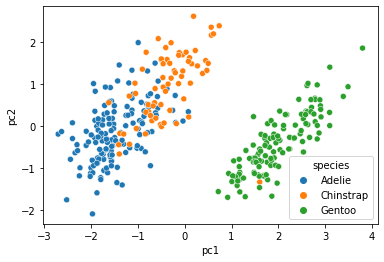

In [19]:
sns.scatterplot(pc12['pc1'], pc12['pc2'], hue = df['species'])
plt.show()

## 🔥 도전 과제

모두 하면 됩니다.

### 1.  "One-hot-encoding"을 이용하여 categorical 데이터를 numerical 하게 변환시켜서 PCA를 다시 시행해보세요.

### 2. "Scree Plot" 에 대해서 알아보고, 위에서 PCA로 만든 데이터셋을 사용하여 만들어보세요. 90%의 내용을 설명하기 위해서, 몇개의 PC를 사용해야 하나요?


In [20]:
oh_df = pd.get_dummies(df)
oh_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
3,NaN,NaN,NaN,NaN,1,0,0,0,0,1,0,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0


In [21]:
oh_df = oh_df.dropna()

In [22]:
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

Z1 = scaler.fit_transform(oh_df)
print("\n Standardized Data: \n", Z1)

pca = PCA(2)

pca.fit(Z1)

print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

B1 = pca.transform(Z1)
print("\n Projected Data: \n", B1)


 Standardized Data: 
 [[-0.88449874  0.78544923 -1.41834665 ...  2.38869888 -0.9655068
   1.01770049]
 [-0.81112573  0.1261879  -1.06225022 ...  2.38869888  1.03572548
  -0.98260737]
 [-0.66437972  0.43046236 -0.42127665 ...  2.38869888  1.03572548
  -0.98260737]
 ...
 [ 1.18828874 -0.73592307  1.50164406 ... -0.41863795 -0.9655068
   1.01770049]
 [ 0.23443963 -1.19233476  0.7894512  ... -0.41863795  1.03572548
  -0.98260737]
 [ 1.09657248 -0.53307343  0.86067049 ... -0.41863795 -0.9655068
   1.01770049]]

 Eigenvectors: 
 [[ 0.27864453 -0.31886704  0.40277558  0.38915582 -0.31524536 -0.11075647
   0.41831017  0.3505491  -0.23590772 -0.1735372  -0.07558574  0.07755708]
 [ 0.39461185  0.2574955   0.07438614  0.08383211 -0.25160206  0.44665879
  -0.11113391 -0.21706282  0.37225524 -0.19779764 -0.35505453  0.3733365 ]]

 Eigenvalues: 
 [5.26638346 2.71974181]

 Projected Data: 
 [[-2.32773924 -0.54021546]
 [-2.23575475 -2.10662993]
 [-2.30100299 -1.98027171]
 [-2.65540132 -2.06075749]
 [

In [26]:
oh_df_pc12 = pd.DataFrame(B1, columns = ['pc1', 'pc2'])
oh_df_pc12.head()

,pc1,pc2
0,-2.327739,-0.540215
1,-2.235755,-2.106630
2,-2.301003,-1.980272
3,-2.655401,-2.060757
4,-2.415185,-0.240422


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


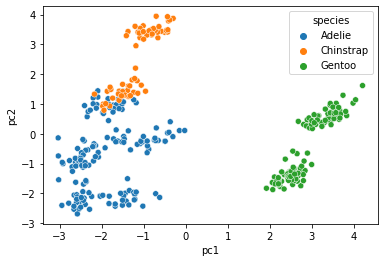

In [27]:
sns.scatterplot(oh_df_pc12['pc1'], oh_df_pc12['pc2'], hue = df['species'])
plt.show()

In [28]:
scaler = StandardScaler()

Z2 = scaler.fit_transform(oh_df)
print("\n Standardized Data: \n", Z2)

pca = PCA(12)

pca.fit(Z2)

print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

B2 = pca.transform(Z2)
print("\n Projected Data: \n", B2)


 Standardized Data: 
 [[-0.88449874  0.78544923 -1.41834665 ...  2.38869888 -0.9655068
   1.01770049]
 [-0.81112573  0.1261879  -1.06225022 ...  2.38869888  1.03572548
  -0.98260737]
 [-0.66437972  0.43046236 -0.42127665 ...  2.38869888  1.03572548
  -0.98260737]
 ...
 [ 1.18828874 -0.73592307  1.50164406 ... -0.41863795 -0.9655068
   1.01770049]
 [ 0.23443963 -1.19233476  0.7894512  ... -0.41863795  1.03572548
  -0.98260737]
 [ 1.09657248 -0.53307343  0.86067049 ... -0.41863795 -0.9655068
   1.01770049]]

 Eigenvectors: 
 [[ 2.78644534e-01 -3.18867039e-01  4.02775578e-01  3.89155818e-01
  -3.15245360e-01 -1.10756474e-01  4.18310166e-01  3.50549096e-01
  -2.35907725e-01 -1.73537204e-01 -7.55857438e-02  7.75570795e-02]
 [ 3.94611852e-01  2.57495502e-01  7.43861392e-02  8.38321119e-02
  -2.51602064e-01  4.46658794e-01 -1.11133913e-01 -2.17062824e-01
   3.72255245e-01 -1.97797637e-01 -3.55054533e-01  3.73336504e-01]
 [-1.19414702e-01  2.50308925e-01  3.73525745e-02  1.85776682e-01
   3.2

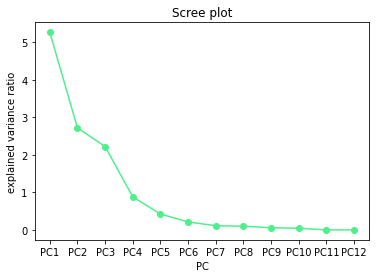

In [29]:

plt.plot(['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 
          'PC11', 'PC12'], pca.explained_variance_, marker='o', color = '#4fef8c')
plt.title('Scree plot')
plt.xlabel('PC')
plt.ylabel('explained variance ratio')
plt.show()